# 01 Import Libraries

In [2]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import matplotlib

In [3]:
matplotlib.__version__

'3.9.2'

In [4]:
# This option ensures the charts you create are displayed in the notebook without the need to "call" them specifically.

#%matplotlib inline

# 02 Import Dataframes

In [4]:
# Importing customer dataframe
path = r'C:\Users\vacgo\Documents\Achievement 6'
district_crime = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'district_crime.pkl'))
neighborhood_crime = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'neighborhood_crime.pkl'))
district_pop = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'district_pop.pkl'))
berlin_crime = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'berlin_crime.pkl'))
gender_pop = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'gender_pop.pkl'))
nationality_pop = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'nationality_pop.pkl'))
migration_pop = pd.read_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'migration_pop.pkl'))

In [7]:
district_crime.head()

,key,neighborhood,district,year,crimes_total,robbery,street_handbag_robbery,physical_injuries_total,dangerous_serious_bodily_harm,dep_of_liberty_coercion_threats_stalking,...,theft_of_motor_vehicles,theft_parts_motor_vehicles,bike_theft,res_burglarly,arson_offense_total,arson,prop_damage_total,prop_damage_graffiti,drugs,neighborhood_offence
0,10000,Mitte,Mitte,2013,25303,319,167,2187,572,650,...,186,1383,1032,436,95,35,1672,405,834,4746
11,20000,Friedrichshain-Kreuzberg,Friedrichshain-Kreuzberg,2013,19413,334,229,1767,530,431,...,222,972,1296,402,98,33,1878,431,882,4163
20,30000,Pankow,Pankow,2013,10458,89,39,747,169,281,...,231,840,1125,265,62,30,1096,288,144,2241
37,40000,Charlottenburg-Wilmersdorf,Charlottenburg-Wilmersdorf,2013,16061,199,80,1246,327,470,...,224,1461,927,518,46,20,1172,277,368,3140
49,50000,Spandau,Spandau,2013,12527,131,62,1255,294,480,...,135,735,429,266,78,20,1301,214,235,3281


In [8]:
district_pop.head()

,Bezirke,Year,Population
22,Mitte,2013,348102
23,Mitte,2014,356506
24,Mitte,2015,363236
25,Mitte,2016,371407
26,Mitte,2017,377965


In [6]:
# Merge the district_crime and district_pop dataframes

district_crime_pop = pd.merge(
    district_crime,
    district_pop,
    left_on=['district', 'year'],  # Columns in district_crime
    right_on=['Bezirke', 'Year']  # Columns in district_pop
)


In [10]:
district_crime_pop.head(30)

,key,neighborhood,district,year,crimes_total,robbery,street_handbag_robbery,physical_injuries_total,dangerous_serious_bodily_harm,dep_of_liberty_coercion_threats_stalking,...,res_burglarly,arson_offense_total,arson,prop_damage_total,prop_damage_graffiti,drugs,neighborhood_offence,Bezirke,Year,Population
0,10000,Mitte,Mitte,2013,25303,319,167,2187,572,650,...,436,95,35,1672,405,834,4746,Mitte,2013,348102
1,20000,Friedrichshain-Kreuzberg,Friedrichshain-Kreuzberg,2013,19413,334,229,1767,530,431,...,402,98,33,1878,431,882,4163,Friedrichshain-Kreuzberg,2013,273517
2,30000,Pankow,Pankow,2013,10458,89,39,747,169,281,...,265,62,30,1096,288,144,2241,Pankow,2013,377532
3,40000,Charlottenburg-Wilmersdorf,Charlottenburg-Wilmersdorf,2013,16061,199,80,1246,327,470,...,518,46,20,1172,277,368,3140,Charlottenburg-Wilmersdorf,2013,322870
4,50000,Spandau,Spandau,2013,12527,131,62,1255,294,480,...,266,78,20,1301,214,235,3281,Spandau,2013,226868
5,60000,Steglitz-Zehlendorf,Steglitz-Zehlendorf,2013,9065,97,41,602,114,294,...,424,43,13,856,217,143,1691,Steglitz-Zehlendorf,2013,298200
6,70000,Tempelhof-Schoeneberg,Tempelhof-Schoeneberg,2013,12485,182,87,1008,245,388,...,310,70,20,1052,204,341,2554,Tempelhof-Schoeneberg,2013,331822
7,80000,Neukoelln,Neukoelln,2013,13989,235,128,1273,372,468,...,363,78,32,1346,206,510,3280,Neukoelln,2013,322153
8,90000,Treptow-Koepenick,Treptow-Koepenick,2013,9561,85,45,821,178,317,...,184,70,31,1153,338,140,1904,Treptow-Koepenick,2013,245951
9,100000,Marzahn-Hellersdorf,Marzahn-Hellersdorf,2013,9859,129,62,1241,243,384,...,164,95,32,1114,245,128,2462,Marzahn-Hellersdorf,2013,254226


In [8]:
# Drop the duplicate key columns if needed
district_crime_pop = district_crime_pop.drop(columns=['neighborhood', 'Bezirke', 'Year'])

In [12]:
district_crime_pop.head()

,key,district,year,crimes_total,robbery,street_handbag_robbery,physical_injuries_total,dangerous_serious_bodily_harm,dep_of_liberty_coercion_threats_stalking,theft_total,...,theft_parts_motor_vehicles,bike_theft,res_burglarly,arson_offense_total,arson,prop_damage_total,prop_damage_graffiti,drugs,neighborhood_offence,Population
0,10000,Mitte,2013,25303,319,167,2187,572,650,11442,...,1383,1032,436,95,35,1672,405,834,4746,348102
1,20000,Friedrichshain-Kreuzberg,2013,19413,334,229,1767,530,431,9024,...,972,1296,402,98,33,1878,431,882,4163,273517
2,30000,Pankow,2013,10458,89,39,747,169,281,5636,...,840,1125,265,62,30,1096,288,144,2241,377532
3,40000,Charlottenburg-Wilmersdorf,2013,16061,199,80,1246,327,470,8021,...,1461,927,518,46,20,1172,277,368,3140,322870
4,50000,Spandau,2013,12527,131,62,1255,294,480,5224,...,735,429,266,78,20,1301,214,235,3281,226868


In [10]:
district_crime_pop.to_pickle(os.path.join(path, '02 Data', 'Cleaned Data', 'district_crime_pop_merged.pkl'))

# 03 Check correlation

In [14]:
# Remove columns that are not int or float
district_crime_pop_corr = district_crime_pop.drop(columns=['key', 'district', 'year'])

In [15]:
# Correlation
district_crime_pop_corr.corr()

,crimes_total,robbery,street_handbag_robbery,physical_injuries_total,dangerous_serious_bodily_harm,dep_of_liberty_coercion_threats_stalking,theft_total,theft_of_motor_vehicles,theft_parts_motor_vehicles,bike_theft,res_burglarly,arson_offense_total,arson,prop_damage_total,prop_damage_graffiti,drugs,neighborhood_offence,Population
crimes_total,1.000000,0.895921,0.857338,0.901975,0.903767,0.657914,0.969088,-0.153082,0.695007,0.700110,0.325901,0.450918,0.352650,0.840572,0.650947,0.786790,0.930177,0.303770
robbery,0.895921,1.000000,0.976044,0.838286,0.896408,0.562544,0.868784,-0.129209,0.640995,0.641699,0.329459,0.579653,0.441345,0.880744,0.609789,0.826610,0.886642,0.112468
street_handbag_robbery,0.857338,0.976044,1.000000,0.816983,0.895468,0.527938,0.823535,-0.155744,0.551474,0.662858,0.217191,0.614346,0.436305,0.897547,0.632683,0.847109,0.862541,0.104076
physical_injuries_total,0.901975,0.838286,0.816983,1.000000,0.947101,0.774611,0.797671,-0.203557,0.517206,0.441834,0.102859,0.621535,0.460604,0.824598,0.520268,0.745103,0.938861,0.100740
dangerous_serious_bodily_harm,0.903767,0.896408,0.895468,0.947101,1.000000,0.720729,0.813986,-0.291701,0.532887,0.571346,0.084052,0.654125,0.498380,0.904001,0.602035,0.875905,0.947811,0.147230
dep_of_liberty_coercion_threats_stalking,0.657914,0.562544,0.527938,0.774611,0.720729,1.000000,0.517188,-0.430309,0.487770,0.097981,0.010318,0.544474,0.414626,0.520896,0.122594,0.464934,0.768305,0.099058
theft_total,0.969088,0.868784,0.823535,0.797671,0.813986,0.517188,1.000000,-0.028283,0.739795,0.788058,0.446760,0.325023,0.273239,0.780375,0.657760,0.717996,0.862819,0.369184
theft_of_motor_vehicles,-0.153082,-0.129209,-0.155744,-0.203557,-0.291701,-0.430309,-0.028283,1.000000,0.138696,0.029854,0.293184,-0.260032,-0.133509,-0.198652,-0.063724,-0.341206,-0.233549,-0.174674
theft_parts_motor_vehicles,0.695007,0.640995,0.551474,0.517206,0.532887,0.487770,0.739795,0.138696,1.000000,0.459182,0.568467,0.208368,0.251519,0.473532,0.263981,0.435993,0.613424,0.196998
bike_theft,0.700110,0.641699,0.662858,0.441834,0.571346,0.097981,0.788058,0.029854,0.459182,1.000000,0.249679,0.160117,0.104368,0.684821,0.793983,0.657647,0.562973,0.480261


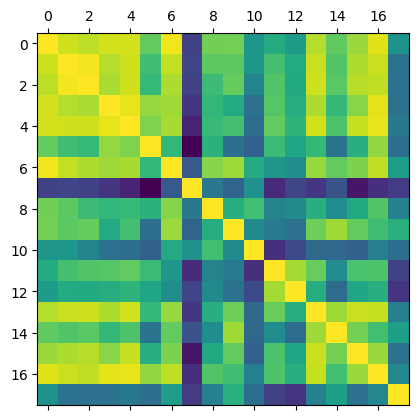

In [17]:
# Correlation heatmap
plt.matshow(district_crime_pop_corr.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

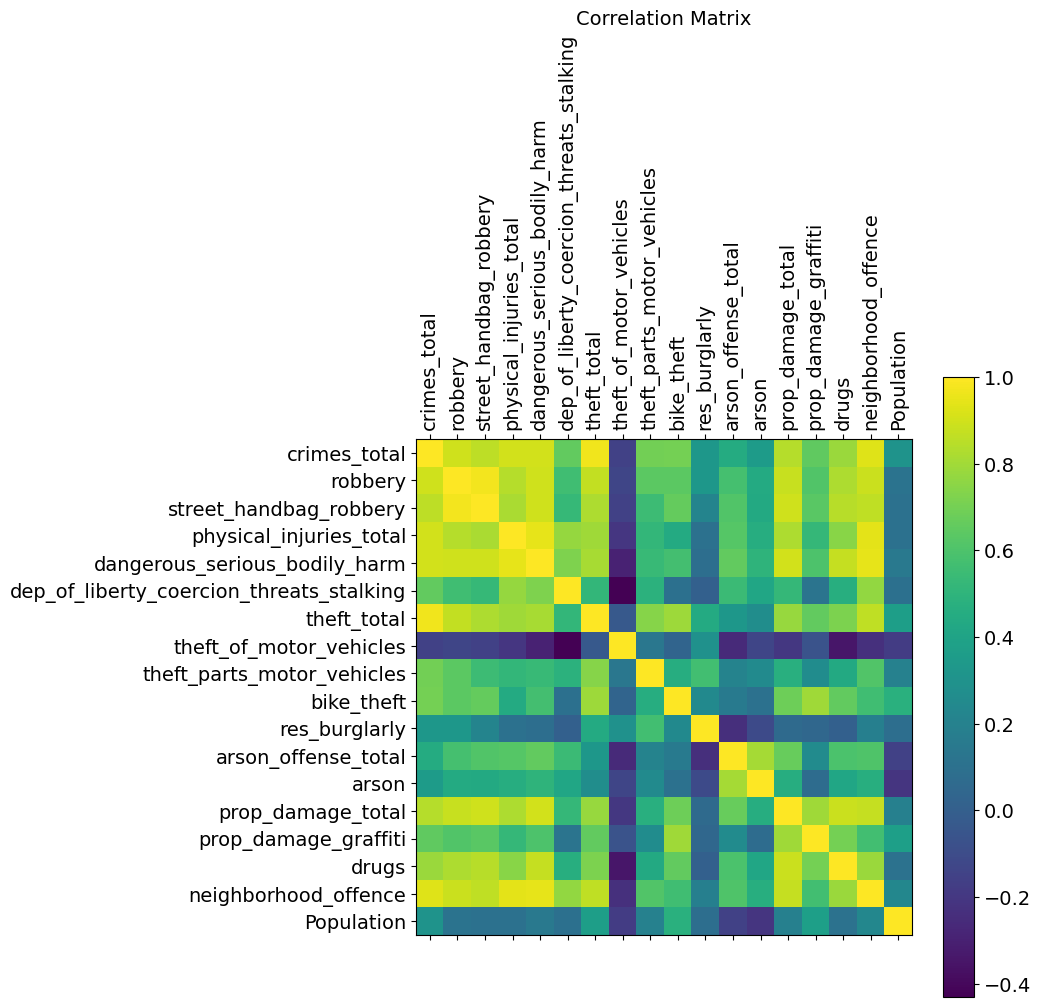

In [16]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(district_crime_pop_corr.corr(), fignum=f.number) # type of plot
plt.xticks(range(district_crime_pop_corr.shape[1]), district_crime_pop_corr.columns, fontsize=14, rotation=90) # x axis labels
plt.yticks(range(district_crime_pop_corr.shape[1]), district_crime_pop_corr.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title

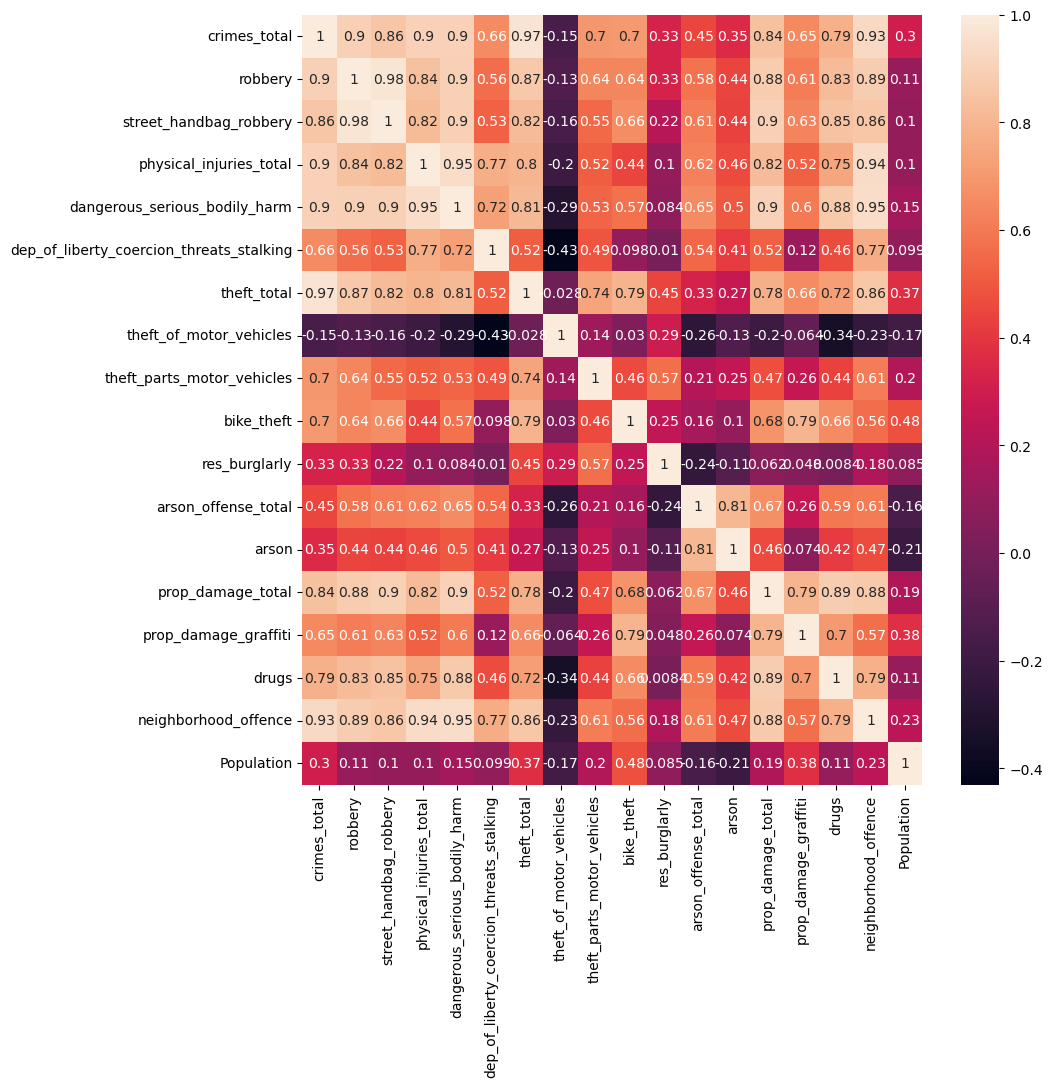

In [18]:
# Create a heatmap using seaborn

f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(district_crime_pop_corr.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.
# Show the plot
plt.show()

### From the heatmap, we can see that there are high correlation of certain crimes than the others. For example, we can see a high correlation between robbery, street and handbag robbery, physical injuries, property damage and neighborhood offence. Surprisingly there is a low correlation with the population for the crimes.
### That means that wherever there are high robbery rates, there is a high probability that physical injury, bodily harm, property damage, and neighborhood offences are also high.

In [39]:
#export heatmap
corr.figure.savefig(os.path.join(path, '04 Visualizations', 'heatmap_dist_crime.png'))

# 04 Check scatterplot of selected variables

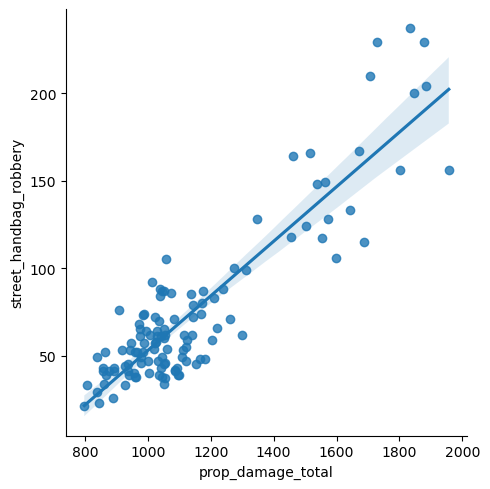

In [47]:
# Selecting some variables to check in scatterplot

scatter_1 = sns.lmplot(x = 'prop_damage_total', y = 'street_handbag_robbery', data = district_crime_pop_corr)
plt.show()

In [51]:
#export scatterplot
scatter_1.figure.savefig(os.path.join(path, '04 Visualizations', 'scat1_prop_damage_street_robbery.png'))

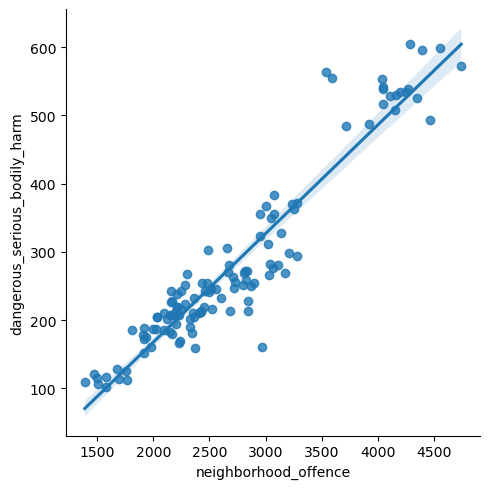

In [49]:
scatter_2 = sns.lmplot(x = 'neighborhood_offence', y = 'dangerous_serious_bodily_harm', data = district_crime_pop_corr)
plt.show()

In [53]:
#export scatterplot
scatter_2.figure.savefig(os.path.join(path, '04 Visualizations', 'scat2_neighborhood_body_harm.png'))

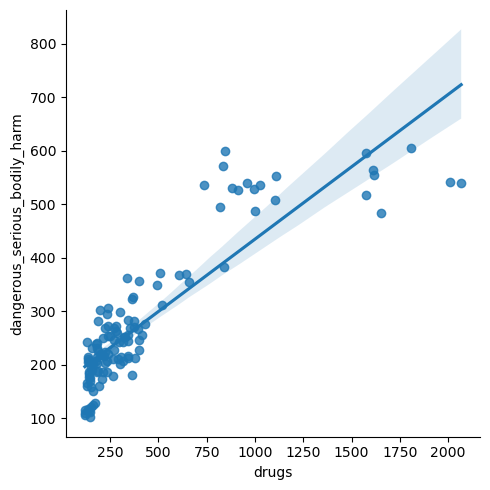

In [83]:
scatter_3 = sns.lmplot(x = 'drugs', y = 'dangerous_serious_bodily_harm', data = district_crime_pop_corr)
plt.show()

In [85]:
#export scatterplot
scatter_3.figure.savefig(os.path.join(path, '04 Visualizations', 'scat3_drugs_body_harm.png'))

# 05 Pair plots

In [60]:
district_crime_pop_corr.columns

Index(['crimes_total', 'robbery', 'street_handbag_robbery',
       'physical_injuries_total', 'dangerous_serious_bodily_harm',
       'dep_of_liberty_coercion_threats_stalking', 'theft_total',
       'theft_of_motor_vehicles', 'theft_parts_motor_vehicles', 'bike_theft',
       'res_burglarly', 'arson_offense_total', 'arson', 'prop_damage_total',
       'prop_damage_graffiti', 'drugs', 'neighborhood_offence', 'Population'],
      dtype='object')

In [62]:
# Keep only the variables you want to use in the pair plot

sub = district_crime_pop_corr[['robbery', 'street_handbag_robbery', 'dangerous_serious_bodily_harm', 'prop_damage_total', 'drugs', 'neighborhood_offence']]

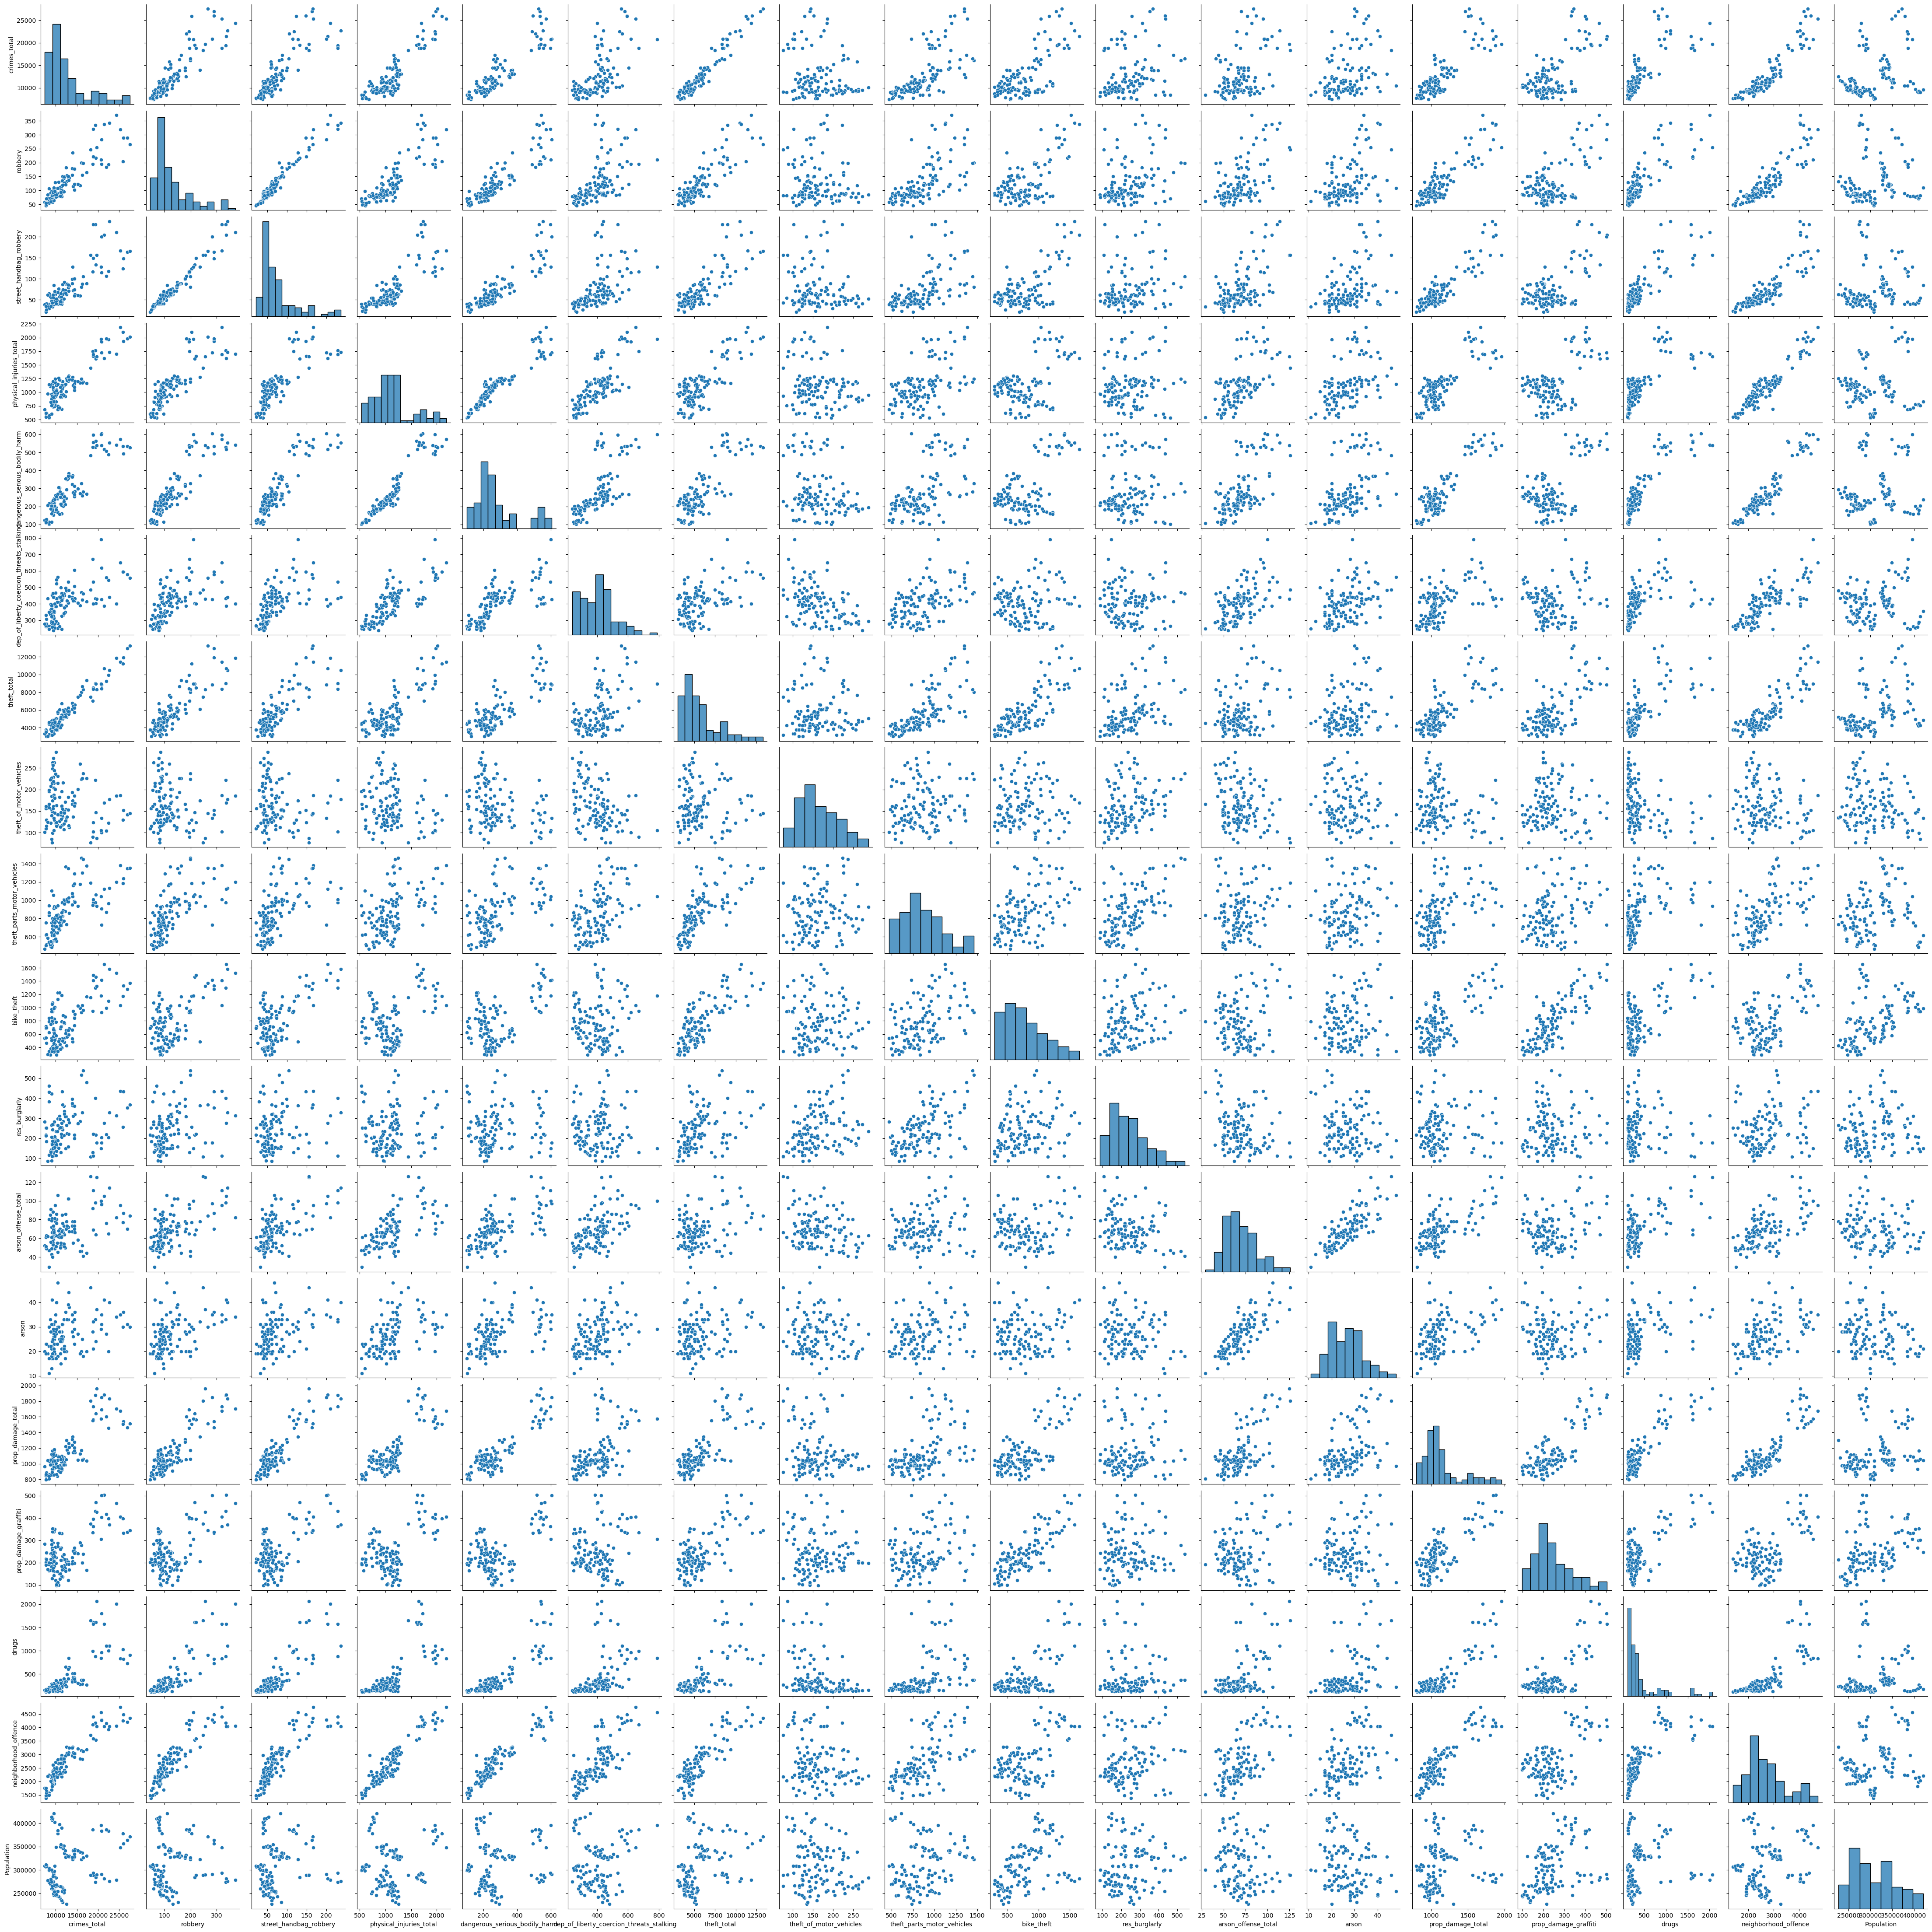

In [68]:
# Create a pair plot 

pair_all = sns.pairplot(district_crime_pop_corr)
plt.show()

In [70]:
#export pair plot 
pair_all.figure.savefig(os.path.join(path, '04 Visualizations', 'pairplot_all.png'))

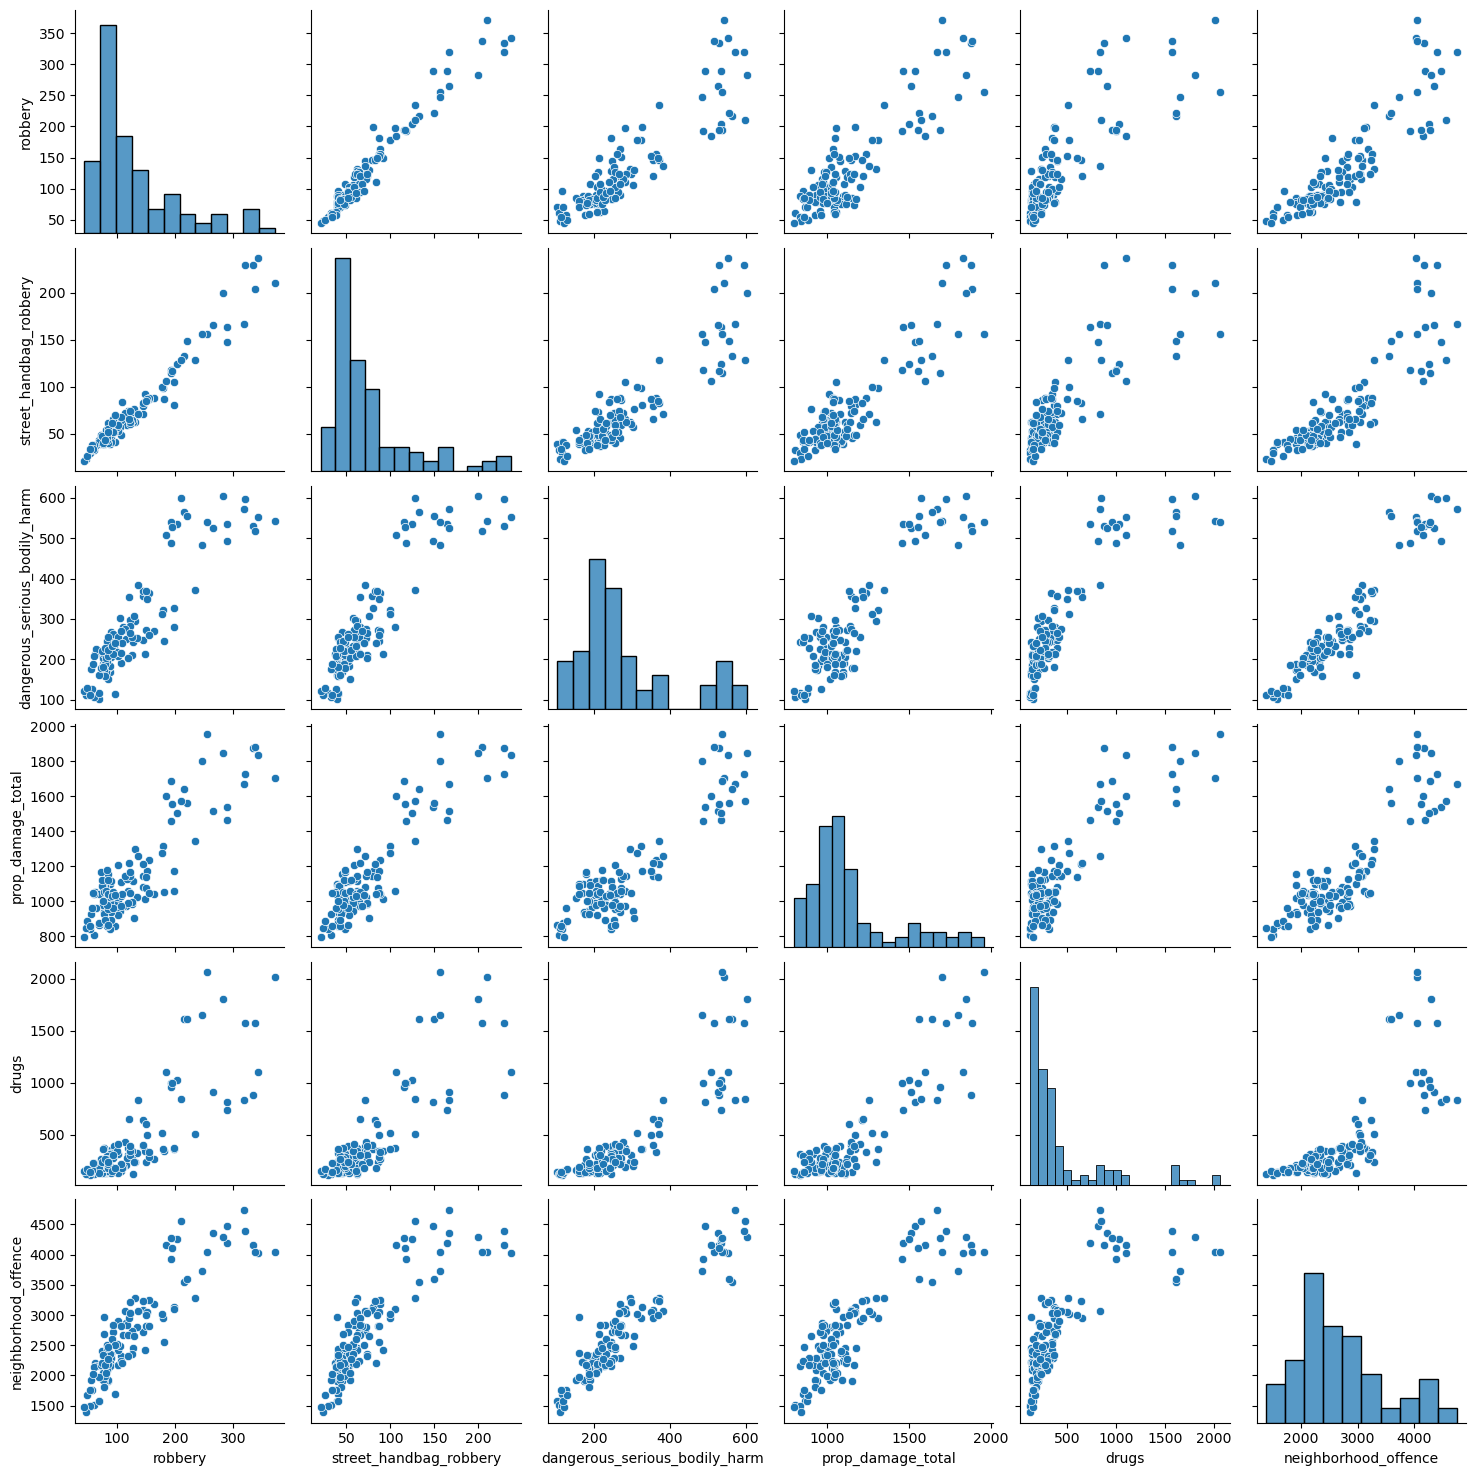

In [72]:
# Create a pair plot for selected variable

sub_pair = sns.pairplot(sub)
plt.show()

In [74]:
#export pair plot 
sub_pair.figure.savefig(os.path.join(path, '04 Visualizations', 'pairplot_sub.png'))

### Looking at the pairplots for all variables, it is difficult to see as there are too many pairs to look at, but it gives you an overall view of the relationship. As we can see, there are a lot of pairs that has very small correlation, where the scatterplot is well, scattered. There are no obvious or clear correlation. However, I did create another pairplot of variables with high correlation. We can clearly see here that there is a clear pattern between them. I added the drugs variable since I know in my area there is a drug problem so this is one of my concerns too. It seems that drug crimes also influence other crimes such as bodily harm and property damage.

# 06 Categorical Plot

In [121]:
district_crime_pop_corr.head()

,crimes_total,robbery,street_handbag_robbery,physical_injuries_total,dangerous_serious_bodily_harm,dep_of_liberty_coercion_threats_stalking,theft_total,theft_of_motor_vehicles,theft_parts_motor_vehicles,bike_theft,res_burglarly,arson_offense_total,arson,prop_damage_total,prop_damage_graffiti,drugs,neighborhood_offence,Population
0,25303,319,167,2187,572,650,11442,186,1383,1032,436,95,35,1672,405,834,4746,348102
1,19413,334,229,1767,530,431,9024,222,972,1296,402,98,33,1878,431,882,4163,273517
2,10458,89,39,747,169,281,5636,231,840,1125,265,62,30,1096,288,144,2241,377532
3,16061,199,80,1246,327,470,8021,224,1461,927,518,46,20,1172,277,368,3140,322870
4,12527,131,62,1255,294,480,5224,135,735,429,266,78,20,1301,214,235,3281,226868


<Axes: xlabel='neighborhood_offence', ylabel='Count'>

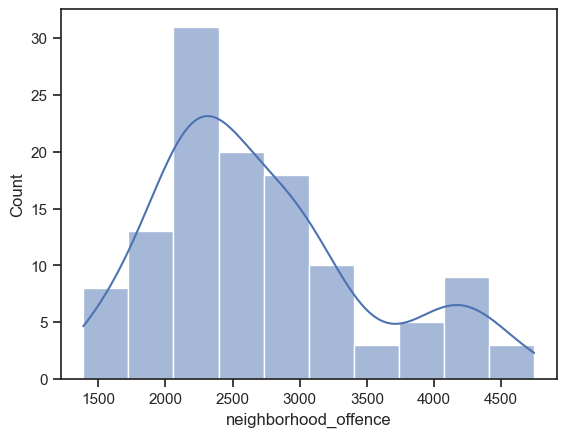

In [149]:
sns.histplot(district_crime_pop_corr['neighborhood_offence'], bins = 10, kde = True)

In [153]:
district_crime_pop_corr['neighborhood_offence'].describe()

count     120.000000
mean     2708.041667
std       785.143357
min      1388.000000
25%      2168.000000
50%      2493.500000
75%      3067.750000
max      4746.000000
Name: neighborhood_offence, dtype: float64

## Categorizing neighborhood_offence

In [170]:
district_crime_pop_corr.loc[district_crime_pop_corr['neighborhood_offence'] <= 2168, 'neighborhood_offence_category'] = 'Low crime'

In [160]:
district_crime_pop_corr.loc[(district_crime_pop_corr['neighborhood_offence'] > 2168) & (district_crime_pop_corr['neighborhood_offence'] < 3067), 'neighborhood_offence_category'] = 'Medium crime'

In [162]:
district_crime_pop_corr.loc[district_crime_pop_corr['neighborhood_offence'] >= 3067, 'neighborhood_offence_category'] = 'High crime'

In [172]:
district_crime_pop_corr['neighborhood_offence_category'].value_counts(dropna = False)

neighborhood_offence_category
Medium crime    59
Low crime       31
High crime      30
Name: count, dtype: int64

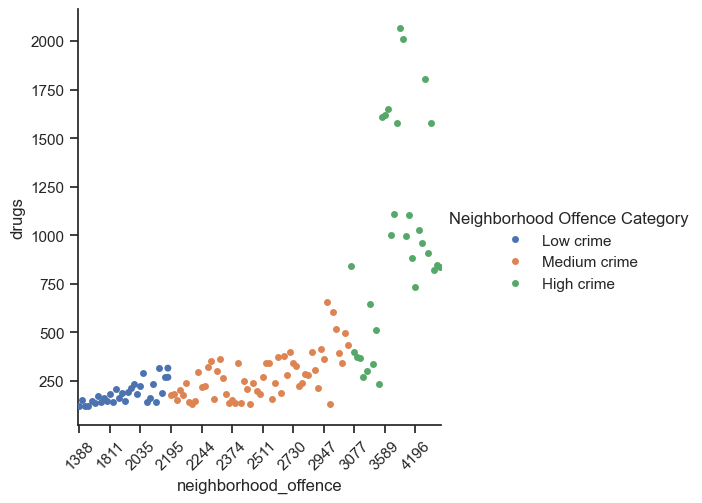

In [198]:
# Create a categorical plot in seaborn using the price categories created above

catplot = sns.catplot(x="neighborhood_offence", y="drugs", hue="neighborhood_offence_category", data=district_crime_pop_corr)
ticks = catplot.ax.get_xticks()
plt.xticks(ticks[::10], rotation=45)  # Show every 2nd tick and rotate the labels
catplot.legend.set_title("Neighborhood Offence Category")

In [200]:
#export categorical plotting
catplot.figure.savefig(os.path.join(path, '04 Visualizations', 'catplot_neighborhood_vs_drugs.png'))

#### We can see that the number of drug crimes does not really go up with neighborhood offence. However, when we reach the high crime category for neighborhood offence, drug crime shoot up dramatically.

# 07 Answer to question

## Correlation with Population: Do districts with higher populations have a higher rate of certain crimes per 100,000 population?
### Based on the correlation heatmap, it seems that the district population does not really affect crime rates. The crime with the highest correlation with population is bike_theft, but that is just 0.48 which is a weak correlation.


# 08 Next to investigate

## I would like to explore the next dataframes containing crimes vs population with different migration backgrounds. And also woule like to see which districts and neighborhoods are more prone to which crimes. From this exploratory investigation, I can say that population is not really a factor for higher crime rate. But I would like to disprove it with more data. So I will retain my hyphotesis

## Hypothesis: The higher the population of districts, the higher the crime rate.
## Hypothesis 2: The higher the population of foreigners, the higher the crime rate.
## Hypothesis 3: The poorer the district, the higher the crime rate.